<a href="https://colab.research.google.com/github/kuresh02/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Capstone_Project__Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>
## **Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**
 <img src="https://c0.wallpaperflare.com/preview/744/742/341/action-bicycles-bike-rental-grass.jpg" width="2500" height="650" >



## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Import required modules and Loading our Dataset**

In [38]:
# import the modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# **Mount the drive and import the dataset**

In [39]:
# mount the google drive for import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# loding the dataset of seoul bike data from google driver

path="/content/drive/MyDrive/Capstone_Project/Capstone_Project_02_Supervised ML - Regression/ColabNote_and_Data/SeoulBikeData.csv"
bike_df=pd.read_csv(path,encoding ='latin')

# **Understanding Our dataset**

## **Data summary**

### ***Find the head and tail of dataframe***

In [41]:
# view the top 5 row of our dataset 
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
# view the bottom 5 row of our dataset 
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### ***Finding the total row and coulmn in the dataset***

In [43]:
#find the shape of our dataset with total number of row and coulumn
print (bike_df.shape)
print (f'Total number of rows in this dataet is :{bike_df.shape[0]}')
print (f'Total number of columns in this dataet is :{bike_df.shape[1]}')

(8760, 14)
Total number of rows in this dataet is :8760
Total number of columns in this dataet is :14


### ***Finding all the coulmn present in the dataframe***

In [44]:
#find all the column name present in the dataset
print ("The features present in the dataset: ")
bike_df.columns



The features present in the dataset: 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### ***Information regarding overall dataset***

In [45]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## ***Observation on dataset info***

1. Null values/missing values- 0
2. Data column need to covert from object datatype to proper data type.
3. Columns need to convert from object type to numeric type.

  *   List seasons
  *   Holiday
  *   Functioning day
4. Rename column where required
  * Temperature(°C)
   * Humidity(%)
   * Wind speed (m/s)
   * Visibility (10m)
   * Dew point temperature(°C)
   * Solar Radiation (MJ/m2)
   * Rainfall(mm)
   * Snowfall (cm)
   * Rented Bike Count
   *Functioning Day
   
   (Beacuse spaces and variables having units in brackets makes difficult to copy variable name.)





# **Clearing Data Process**
###The most important steps before going for the  EDA(Exploratory Data Analysis)
###As we know clearing data will remove the conflict between any duplicate data/row.



## *We have to do the above data cleaning process through the following steps:-*

###1) Missing values finding and replacing with proper values.
###2)  Adding some required new columns.
###3) Change required column data types from Object to appropriate datatypes.
###4)  Checking duplicate rows in dataset.

In [46]:
#cheking the columns 
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [47]:
#As column name contain space and variables having units in brackets we have to change it for better understanding
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'}, inplace=True) 

In [49]:
#change the datatype of date columns to "date","month","year"
bike_df['Date']=bike_df['Date'].astype("datetime64[ns]")
# bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))


In [51]:
bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day_name()


In [52]:
#set weekend is 1 and weekdays 0
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
#check new data set
bike_df.head(5)

In [54]:
#Drop the Date and Day column
bike_df.drop(['Date','Day'], axis=1, inplace =True)


In [55]:
bike_df.head(5)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0


## ***Checking each column data value***

In [56]:
from pandas.core.base import value_counts


In [57]:
#Get distinct categories counts for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [58]:
#Get distinct categories counts for Seasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [59]:
#Get distinct categories counts for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [60]:
#Get distinct categories counts for Weekdays_or_weekend categories
bike_df['Weekdays_or_weekend'].value_counts()

0    6264
1    2496
Name: Weekdays_or_weekend, dtype: int64

In [61]:
#Get distinct categories counts for Month categories
bike_df['Month'].value_counts()

12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [62]:
#checking the Summary of bike dataset
bike_df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Year,Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,0.284932
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,0.451408
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,1.000000


In [63]:
#checking the Null value
bike_df.isnull().sum()
# print(f"We have {duplicates} rows in our Bike Data.")

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Year                     0
Month                    0
Weekdays_or_weekend      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

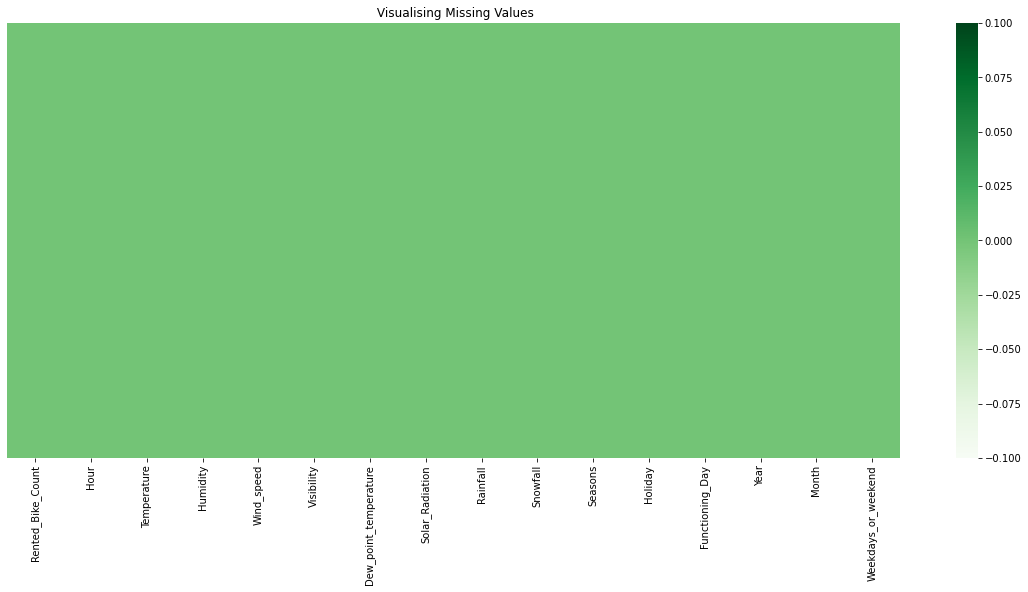

In [64]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isnull(),cmap='Greens',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## There is No Null values in the Dataset.

## ***Duplicate value checking***

In [65]:
#checkimg Duplicate rows in BikeData.

duplicates=bike_df.duplicated().sum()
print(f"We have {duplicates} rows in our Bike Data.")

# No duplicate rows found

We have 0 rows in our Bike Data.


# **Performing Exploratory Data Analysis------>EDA**

**Why do we perform EDA?**

* An EDA is a thorough examination meant to uncover the 
underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

# **Univariate Analysis**

**Why do you do univariate analysis?**
* The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* A dependent variable is a variable whose value will change depending on the value of another variable. In analysis we do work around this variable.In simple word they are depends upon other value.

# **Analysis of Independent variable wrt Dependent variable**


**1.Categorical variables**

**2.Numerical variables**




## **Categorical variables**

**What is a categorical variables in data analysis?**
* Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type.

## **1. Rented bike vs Month**

In [ ]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Month barplot
sns.barplot(data = bike_df,x = 'Month',y = 'Rented_Bike_Count',)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()




*   From the above bar plot is clearly showing that from jan to jun demand for the rented bike is growing high and then slowly the demand start droping till Sep and than again a small demand increase for some a month and then it decrease.







## **2.Rented bikes acording to weekdays and weekend**


In [ ]:
# Give a size 
fig,ax=plt.subplots(figsize=(10,8))

# Rented_Bike_Count v/s Weekdays_or_weekend barplot
sns.barplot(data = bike_df,x = 'Weekdays_or_weekend',y = 'Rented_Bike_Count',)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

## **3.Rented bikes demand wrt hour on weekdays and weekends** 

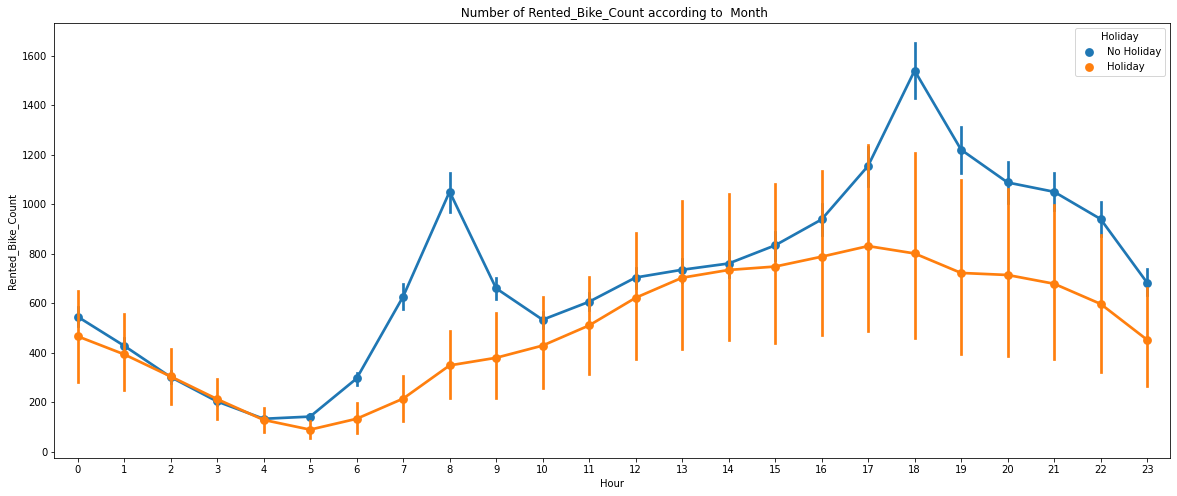

In [72]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Holiday and No-Holiday barplot in hourly
sns.pointplot(data = bike_df,x = 'Hour',y = 'Rented_Bike_Count',hue='Holiday',ax=ax)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

*  ### From this pointplot graph we can see that on holiday ranted bike demand is less as compaired to No-holiday.Between 7am-9am and 5pm-7pm demand of rented bike is high  




## **4.Rented bikes demand wrt Functioning Day** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

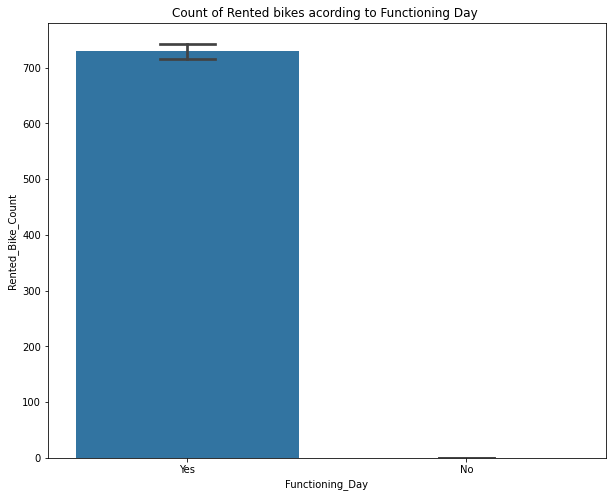

In [89]:
#anlysis of data by vizualisation on function day
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

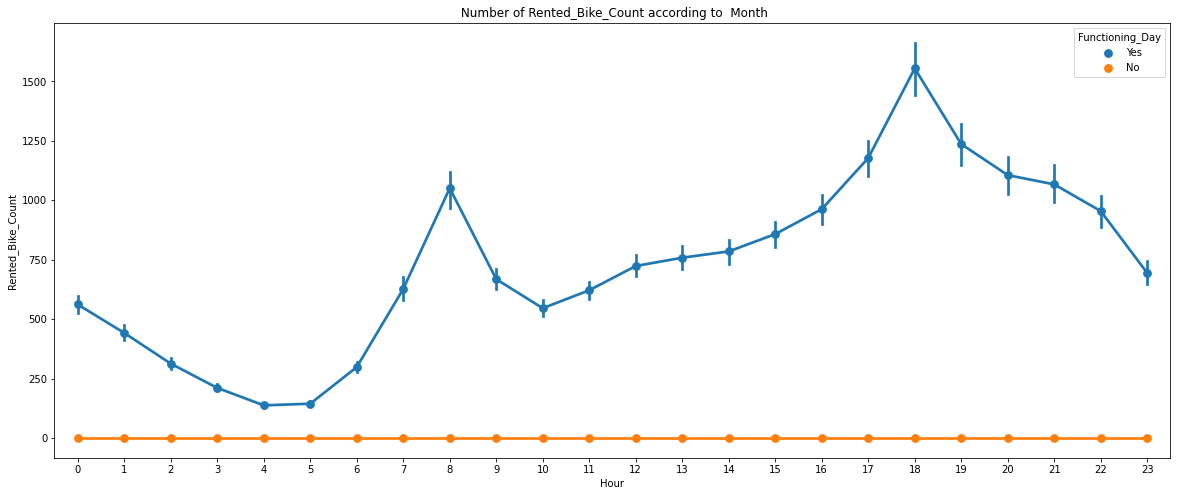

In [90]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Functioning_Day barplot in hourly
sns.pointplot(data = bike_df,x = 'Hour',y = 'Rented_Bike_Count',hue='Functioning_Day',ax=ax)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

*  ### In the above bar plot and point plot which shows the use of rented bike in functioning days or not, and it clearly shows that,Peoples dont use reneted bikes in no functioning day.

## **5.Rented bikes demand wrt Season** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

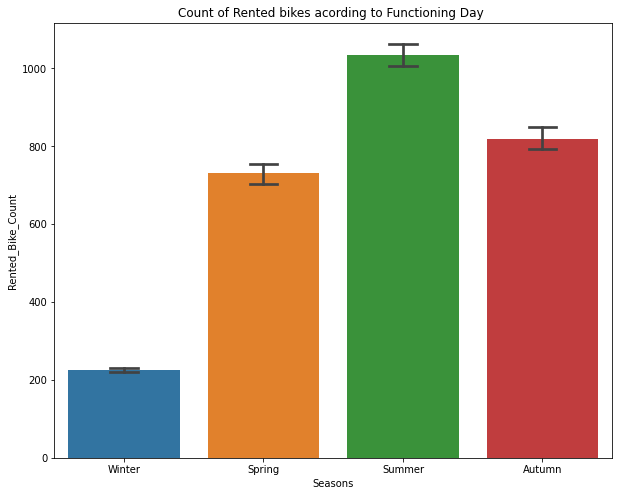

In [79]:
#anlysis of data by vizualisation on season
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

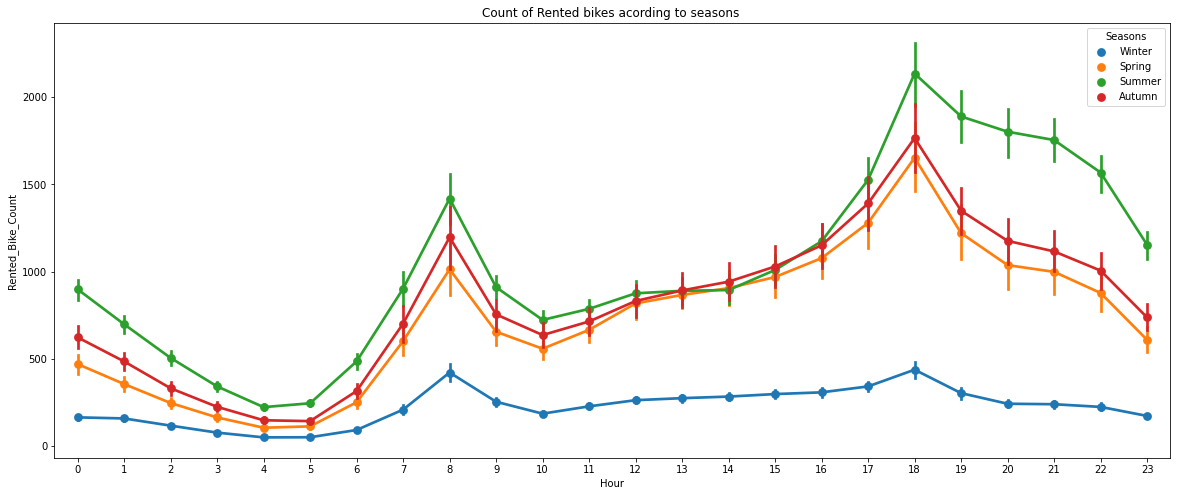

In [81]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')


*   ###    Form the bar chart and pointplot we can clearly say that in Summer demand is high as compaired to other season and in winter the demand is lowest.

*   ###    Point chart also tell that in morning from 7-9am and 5-7pm demand is high in every season






# **6.Rented bikes demand wrt hour,**

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')



*   ## In this barchart the demand of bike is at 8am am and at 6pm is highest. 


